In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from os import listdir
from os.path import join 
from PIL import Image
from torchvision.transforms import Compose, RandomCrop, ToTensor, ToPILImage, CenterCrop, Resize

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Select data directory
data_dir = '/content/gdrive/My Drive/DeepLearningProject/data'
print('The data directory is %s' % data_dir)

project_dir = '/content/gdrive/My Drive/DeepLearningProject'
if not os.path.isdir(project_dir + '/data'):
    raise Exception('Data directory does not exist. Please ensure gdrive is mounted correctly.')

The data directory is /content/gdrive/My Drive/DeepLearningProject/data


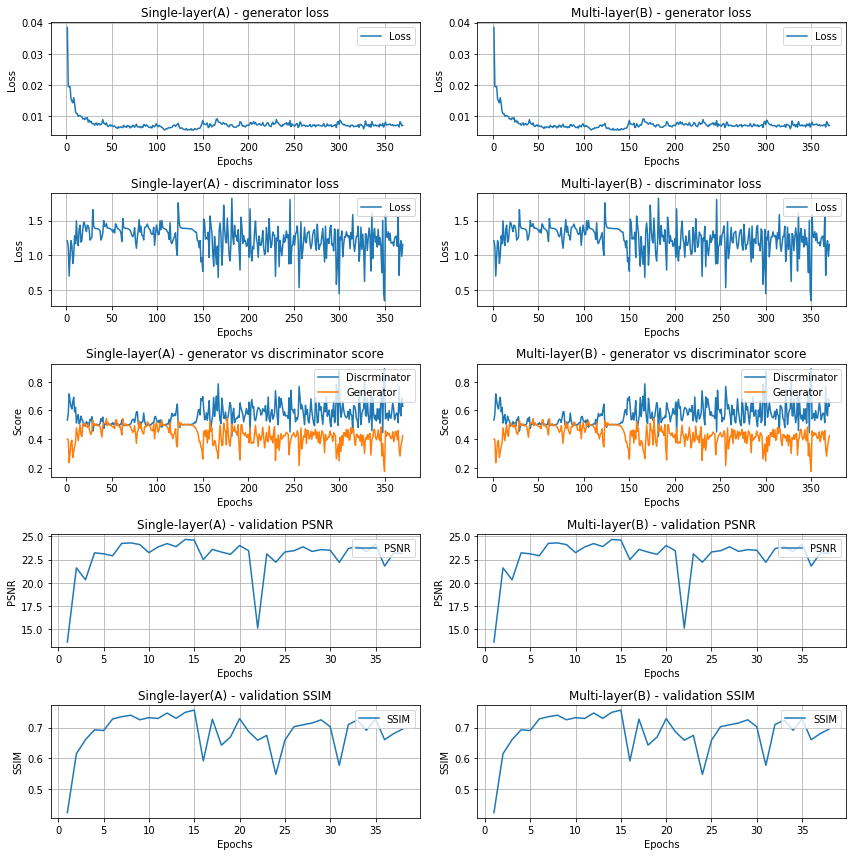

In [0]:
def plt_data(ax, d1, d2,LABEL, TITLE, YLABEL, XLABEL,fill=False):
  if fill == False:
    ax.plot(d1.flatten(), d2.flatten(), label=LABEL)
  else:
    ax.fill_between(d1.flatten(), d2.flatten(), label=LABEL)
  ax.set_title(TITLE)
  ax.legend(loc='upper right')
  ax.grid()
  ax.set_ylabel(YLABEL)
  ax.set_xlabel(XLABEL)

def plt_session(ax_all, col, label, train_csv, val_csv):
  train_read = pd.read_csv(train_csv)
  train_df_epoch = train_read[['Epoch']].values
  train_df_values = train_read[['Loss_D', 'Loss_G','Score_D', 'Score_G']].values

  val_read = pd.read_csv(val_csv)
  val_df_epoch = val_read[['Val batch no.']].values
  val_df_values = val_read[['PSNR', 'SSIM']].values

  plt_data(ax_all[0][col], train_df_epoch, train_df_values[:,1],
           'Loss', label + ' - generator loss','Loss','Epochs', False)
  plt_data(ax_all[1][col], train_df_epoch, train_df_values[:,0],
           'Loss', label + ' - discriminator loss','Loss','Epochs', False)
  plt_data(ax_all[2][col], train_df_epoch, train_df_values[:,2],
           'Discrminator',label + ' - generator vs discriminator score','Score','Epochs', False)
  plt_data(ax_all[2][col], train_df_epoch, train_df_values[:,3],
           'Generator', label + ' - generator vs discriminator score','Score','Epochs', False)
  plt_data(ax_all[3][col], val_df_epoch, val_df_values[:,0],
           'PSNR', label + ' - validation PSNR','PSNR','Epochs', False)
  plt_data(ax_all[4][col], val_df_epoch, val_df_values[:,1],
           'SSIM', label + ' - validation SSIM','SSIM','Epochs', False)

A_TRAIN_CSV = data_dir + "/Training_Results/SRF_4_20190518_162026_statistics/srf_4_training_results_370.csv"
A_VALID_CSV = data_dir + "/Training_Results/SRF_4_20190518_162026_statistics/srf_4_validation_results_370.csv"
B_TRAIN_CSV = data_dir + "/Training_Results/SRF_4_20190518_162026_statistics/srf_4_training_results_370.csv"
B_VALID_CSV = data_dir + "/Training_Results/SRF_4_20190518_162026_statistics/srf_4_validation_results_370.csv"

fig, ax_all = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
plt_session(ax_all, 0, "Single-layer(A)", A_TRAIN_CSV, A_VALID_CSV)
plt_session(ax_all, 1, "Multi-layer(B)", B_TRAIN_CSV, B_VALID_CSV)
fig.tight_layout()


In [0]:
# Visualize training progress with the validation images

val_image_ = data_dir + "/Training_Results/SRF_4_20190518_162026_images/srf_4_training_results_370.csv"


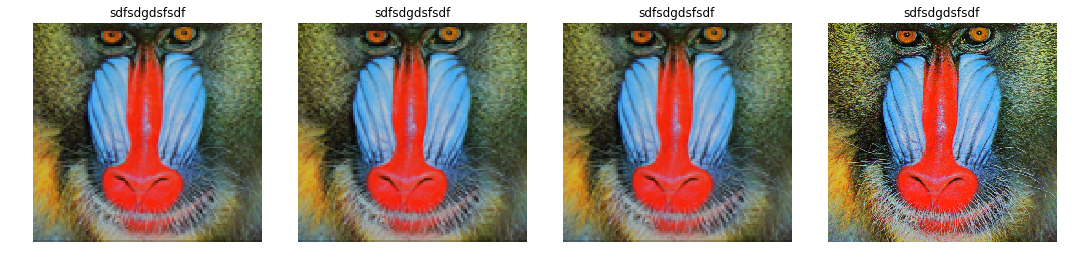

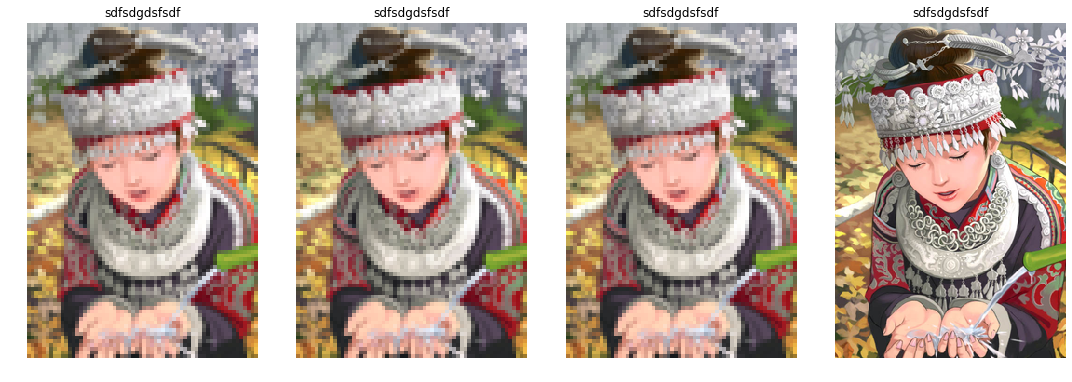

In [0]:
from PIL import Image


def plot_testimg(img, loc, TITLE):
  ax4 = plt.subplot2grid(gridsize, (0, loc))
  _ = ax4.imshow(img)
  _ = ax4.set_title(TITLE)
  _ = ax4.axis('off')
  

test1_lr = Image.open(data_dir + '/Low_x4_Res_Test/baboon_LR.png')
test1_hr = Image.open(data_dir + '/Low_x4_Res_Test/baboon_HR.png')
test1_sr_single = test1_sr_multi = test_lr
# test_sr = ToPILImage()(netG(lr).cpu());

# PSNR_val = 10 * log10(1 / ((ToTensor()(test_sr) - ToTensor()(test_hr)) ** 2).data)
# SSIM_val = ssim(test_sr, test_hr).data.item()

    
gridsize = (1, 4)
fig = plt.figure(figsize=(15, 10));
plot_testimg(test1_lr,0,"sdfsdgdsfsdf")
plot_testimg(test1_sr_single,1,"sdfsdgdsfsdf")
plot_testimg(test1_sr_multi,2,"sdfsdgdsfsdf")
plot_testimg(test1_hr,3,"sdfsdgdsfsdf")
fig.tight_layout()

test2_lr = Image.open(data_dir + '/Low_x4_Res_Test/comic_LR.png')
test2_hr = Image.open(data_dir + '/Low_x4_Res_Test/comic_HR.png')
test2_sr_single = test2_sr_multi = test2_lr

# test_sr = ToPILImage()(netG(lr).cpu());

# PSNR_val = 10 * log10(1 / ((ToTensor()(test_sr) - ToTensor()(test_hr)) ** 2).data)
# SSIM_val = ssim(test_sr, test_hr).data.item()


gridsize = (1, 4)
fig = plt.figure(figsize=(15, 10));
plot_testimg(test2_lr,0,"sdfsdgdsfsdf")
plot_testimg(test2_sr_multi,1,"sdfsdgdsfsdf")
plot_testimg(test2_sr_single,2,"sdfsdgdsfsdf")
plot_testimg(test2_hr,3,"sdfsdgdsfsdf")
fig.tight_layout()



In [0]:
import zipfile

file = zipfile.ZipFile('/content/gdrive/My Drive/DeepLearningProject/data/Training_Results_Orig/drive-download-20190519T175120Z-002.zip')
file.extractall("/content/gdrive/My Drive/DeepLearningProject/data/Training_Results_Orig")

# Conclusion


# Future development
  